#  Pokemon Data

# setup

In [82]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import array as arr
from sklearn.metrics import r2_score
from scipy.stats import linregress

# Getting and setting up dataset
df = pd.read_csv('Pokemon_nomega.csv')
avg = df.Total.mean()
#df.set_index('#', inplace=True)

%matplotlib notebook
%matplotlib inline

#print first 5 items of each column in the dataset
print(df.head())
print(df.tail())

   #        Name Type_1  Type_2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2     Ivysaur  Grass  Poison    405  60      62       63       80       80   
2  3    Venusaur  Grass  Poison    525  80      82       83      100      100   
3  4  Charmander   Fire     NaN    309  39      52       43       60       50   
4  5  Charmeleon   Fire     NaN    405  58      64       58       80       65   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     65           1      False  
4     80           1      False  
       #                 Name   Type_1  Type_2  Total   HP  Attack  Defense  \
744  718      Zygarde50% Form   Dragon  Ground    600  108     100      121   
745  719              Diancie     Rock   Fairy    600   50     100      150   
746  720  HoopaHoopa Confined  Psychic   Ghost    600   80     110      

# Legendary vs Non-Legendary

Base Stats for All Pokemon
Base Stats for Legendaries


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE185154E0>],
      dtype=object)

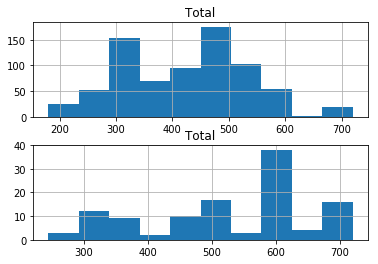

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=1)

df_Legend = df.groupby('Legendary')


legend_count = 0
for i in df.Legendary:
    if i == True:
        legend_count += 1

print("Base Stats for All Pokemon")
df_Legend.head(len(df.Name)-legend_count).hist(column = 'Total', ax=axes[0])
print("Base Stats for Legendaries")
df_Legend.tail(legend_count).hist(column = 'Total', ax=axes[1])
    

# Creating a Dataframe for Each Type

In [74]:
# Type Index
# normal: 0
# Fight: 1
# Flying: 2
# Poison: 3
# Ground: 4
# Rock: 5
# Bug: 6
# Ghost: 7
# Steel: 8
# Fire: 9
# Water: 10
# Grass: 11
# Electric: 12
# Psycic: 13
# Ice: 14
# Dragon: 15
# Dark: 16
# Fairy: 17

#df_type = df.groupby('Type 1')
#print(df_type.head())

df_index = pd.read_csv('Pokemon_typeindex.csv')

types = [None] * 18
df_Adj = df.copy()
for i in range(len(df.Name)):
    df_Adj.loc[i, 'Name'] = len(df['Name'][i])
    
for i in range(18):
    types[i] = df_Adj.copy(deep=True)
    for k in range(len(df_Adj.Type_1)-1, -1, -1):
        if (df_index.Type_1[k] != i and df_index.Type_2[k] != i):
            types[i] = types[i].drop([k])

# Compare Types

In [75]:
def compare_types(col):
    tps = [None]*18
    for i in range(18):
        k = 0
        printed = False
        while printed == False:
            if df_index.Type_1[k] == i:
                tps[i] = [str(types[i].at[k, 'Type_1'] + " Average " +  col + " = "), types[i][col].mean()]
                printed = True
            k += 1
    high = 0

    # Selection Sort to order printing of types based on [col]
    for idx in range(len(tps)):
        min_idx = idx
        for j in range( idx +1, len(tps)):
            if tps[min_idx][1] > tps[j][1]:
                min_idx = j
    # Swap the minimum value with the compared value

        tps[idx], tps[min_idx] = tps[min_idx], tps[idx]      

    for i in range(18):
        print (tps[i][0] + str(round(tps[i][1], 3)))

In [76]:
compare_types('Name')

Poison Average Name = 7.322
Rock Average Name = 7.455
Fairy Average Name = 7.571
Dark Average Name = 7.711
Normal Average Name = 7.724
Water Average Name = 7.792
Psychic Average Name = 7.949
Bug Average Name = 8.044
Ice  Average Name = 8.083
Fire Average Name = 8.19
Ground Average Name = 8.194
Dragon Average Name = 8.22
Steel Average Name = 8.326
Flying Average Name = 8.326
Fighting Average Name = 8.435
Electric Average Name = 8.771
Grass Average Name = 9.022
Ghost Average Name = 11.209


# Compare Stats

In [77]:
def compare_stats(Stat_1, Stat_2, show):
    df_Adj = df.copy()
    if (Stat_1 == '#' or Stat_2 == '#'):
        df_Adj[Stat_1] = df[Stat_1]
        df_Adj[Stat_2] = df[Stat_2]
        if (Stat_1 == 'Name'):
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
        elif (Stat_2 == 'Name'):
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
    else:
        if (Stat_1 == 'Name'):
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
            df_Adj[Stat_2] = df[Stat_2]/df['Total']*avg
        elif (Stat_2 == 'Name'):
            df_Adj[Stat_1] = df[Stat_1]/df['Total']*avg
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
        else:
            df_Adj[Stat_1] = df[Stat_1]/df['Total']*avg
            df_Adj[Stat_2] = df[Stat_2]/df['Total']*avg
    

    # plot the original scatterplot and the LSRL
    if show:
        # get a vector of coefficents which minimize the error squared (function for the LSRL)
        fit = np.polyfit(df_Adj[Stat_1],df_Adj[Stat_2], 1)

        #  fit[0] represents the slope and fit[1] represents the y intercept 
        print('Equation: y = '+str(round(fit[0], 2))+'x + '+str(round(fit[1], 2)))

        # calculate the y values based on the coefficients from the model
        r_x, r_y = zip(*((i, i*fit[0] + fit[1]) for i in df_Adj[Stat_1]))
    
        # put LSRL points into a data frame
        lm_original_plot = pd.DataFrame({
        Stat_1 : r_x,
        Stat_2 : r_y
    })
    
        # setup axes so that the LSRL and the scatterplot show up on the same graph
        fig, axes = plt.subplots()
        
        # setup axes so that the LSRL and the scatterplot show up on the same graph
        fig, axes = plt.subplots()
        
        df_Adj.plot(x=Stat_1, y=Stat_2, kind = 'scatter', ax = axes, title=Stat_1 + ' vs. ' + Stat_2)
        lm_original_plot.plot(x=Stat_1, y=Stat_2, kind = 'line', ax=axes, color = 'red')
        linregress(df_Adj[Stat_1], df_Adj[Stat_2])
        plt.show()
    return (linregress(df_Adj[Stat_1], df_Adj[Stat_2]))
    

Name : Name
Name : Total
Name : HP
Name : Attack
Name : Defense
Name : Sp. Atk
Name : Sp. Def
Name : Speed
Total : Name
Total : Total
Total : HP
Total : Attack
Total : Defense
Total : Sp. Atk
Total : Sp. Def
Total : Speed
HP : Name
HP : Total
HP : HP
HP : Attack
HP : Defense
HP : Sp. Atk
HP : Sp. Def
HP : Speed
Attack : Name
Attack : Total
Attack : HP
Attack : Attack
Attack : Defense
Attack : Sp. Atk
Attack : Sp. Def
Attack : Speed
Defense : Name
Defense : Total
Defense : HP
Defense : Attack
Defense : Defense
Defense : Sp. Atk
Defense : Sp. Def
Defense : Speed
Sp. Atk : Name
Sp. Atk : Total
Sp. Atk : HP
Sp. Atk : Attack
Sp. Atk : Defense
Sp. Atk : Sp. Atk
Sp. Atk : Sp. Def
Sp. Atk : Speed
Sp. Def : Name
Sp. Def : Total
Sp. Def : HP
Sp. Def : Attack
Sp. Def : Defense
Sp. Def : Sp. Atk
Sp. Def : Sp. Def
Sp. Def : Speed
Speed : Name
Speed : Total
Speed : HP
Speed : Attack
Speed : Defense
Speed : Sp. Atk
Speed : Sp. Def
Speed : Speed
Sp. Def : Attack
Equation: y = -0.65x + 120.49


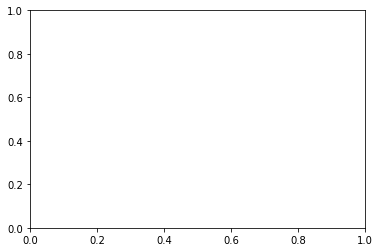

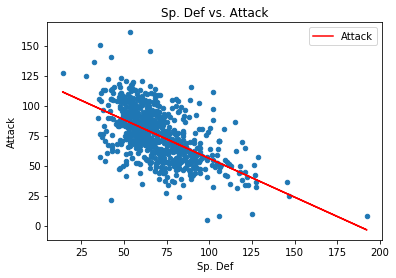

LinregressResult(slope=-0.6450831645147493, intercept=120.48670072818834, rvalue=-0.5719879990539349, pvalue=2.6862414127743344e-66, stderr=0.033847069735152883)

In [80]:
# Compare stats(xAxis, yAxis, Is one of the columns "Total", "#", or "Generation"?)
cols = df.columns
cols = cols.drop(['Type_1', 'Type_2', 'Legendary', 'Generation', '#'])

best_Relationship = ['', '', 0, 0]
for Stat_1 in cols:
    for Stat_2 in cols:
        print(Stat_1 + " : " + Stat_2)
        if (Stat_1 != Stat_2):
            temp = compare_stats(Stat_1, Stat_2, False) 
            if (abs((temp.rvalue*2)/(1-abs(temp.slope))) >= abs((best_Relationship[2]*2)/(abs(1-abs(best_Relationship[3]))))):
                best_Relationship[0] = Stat_1
                best_Relationship[1] = Stat_2
                best_Relationship[2] = temp.rvalue
                best_Relationship[3] = temp.slope

print(best_Relationship[0] + " : " + best_Relationship[1])
compare_stats(best_Relationship[0], best_Relationship[1], True)

Equation: y = -0.65x + 120.88


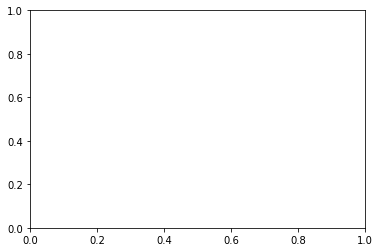

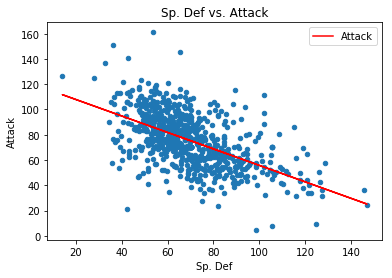

LinregressResult(slope=-0.6509638855924414, intercept=120.87998735059296, rvalue=-0.5643830945198817, pvalue=3.8784827873004544e-64, stderr=0.03486080446931319)

In [81]:
df = df.drop (212)
compare_stats('Sp. Def', 'Attack', True)

9
Equation: y = 0.43x + 4.58
LinregressResult(slope=0.43004383805599855, intercept=4.580956067961133, rvalue=0.30726108320080364, pvalue=7.696688612406496e-18, stderr=0.048731617912246984)


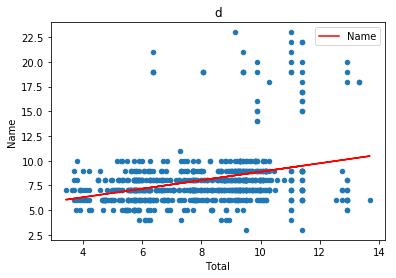

In [13]:
df_Adj = df.copy()
count =  'Total'
for i in range(len(df.Name)):
    df_Adj.loc[i, 'Name'] = len(df['Name'][i])
#df_Adj["#"] = df["#"]
print(df_Adj['Name'][0])
df_Adj[count] = df_Adj[count]/(df_Adj[count].mean())*(df_Adj.Name.mean())
# get a vector of coefficents which minimize the error squared (function for the LSRL)
fit = np.polyfit(df_Adj[count],df_Adj['Name'], 1)

#  fit[0] represents the slope and fit[1] represents the y intercept 
print('Equation: y = '+str(round(fit[0], 2))+'x + '+str(round(fit[1], 2)))

# calculate the y values based on the coefficients from the model
r_x, r_y = zip(*((i, i*fit[0] + fit[1]) for i in df_Adj[count]))

print  (str(linregress(df_Adj[count], df_Adj['Name'])))
# put LSRL points into a data frame
lm_original_plot = pd.DataFrame({
    count : r_x,
    'Name' : r_y
})
# setup axes so that the LSRL and the scatterplot show up on the same graph
fig, axes = plt.subplots()

# plot the original scatterplot and the LSRL
df_Adj.plot(x=count, y='Name', kind = 'scatter', ax = axes, title='d')
lm_original_plot.plot(x=count, y='Name', kind = 'line', ax=axes, color = 'red')

plt.show()

Equation: y = 0.18x + 6.62
LinregressResult(slope=0.17678430209370682, intercept=6.616500001863665, rvalue=0.2713716947480774, pvalue=4.133873746085967e-14, stderr=0.02294077782540685)

# Pokedex

In [104]:
def pokedex(iD, search):
    for i in range(len(df[search])):
        if df[search][i] == iD:
            print (df.loc[i])
            for k in range(4, 11):
                print (df.columns[k] + " z score = " + str((df.iat[i, k]-df[df.columns[k]].mean())/df[df.columns[k]].std()))

In [105]:
pokedex('Shuckle', 'Name')


#                 213
Name          Shuckle
Type_1            Bug
Type_2           Rock
Total             505
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 212, dtype: object
Total z score = 0.7387954962452237
HP z score = -1.8738535024718463
Attack z score = -2.2242306205400797
Defense z score = 5.36771959411479
Sp. Atk z score = -2.0057403634858217
Sp. Def z score = 5.8721795679340465
Speed z score = -2.2105292920216195


LinregressResult(slope=-0.6450831645147493, intercept=120.48670072818834, rvalue=-0.5719879990539349, pvalue=2.6862414127743344e-66, stderr=0.033847069735152883)

LinregressResult(slope=-0.6509638855924414, intercept=120.87998735059296, rvalue=-0.5643830945198817, pvalue=3.8784827873004544e-64, stderr=0.03486080446931319)